In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

/Users/jacobv/pls_gxp/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pheno = pandas.read_csv('/Users/jacobv/Science/PLS_GXP/JakePLS_mmqtl.csv')
pheno

,comp,side,Symbol,Trait,Variant,MeSH_term
0,C1,head,CAV2,Atrial fibrillation,rs1997571,Atrial Fibrillation
1,C1,head,CAV2,I48 Atrial fibrillation and flutter,rs11773845,"Arrhythmias, Cardiac"
2,C1,head,CAV2,heart arrhythmia,rs1997571,"Arrhythmias, Cardiac"
3,C1,head,CCDC88B,C43-C44 Melanoma and other malignant neoplasms...,rs479552,Melanoma
4,C1,head,CCDC88B,C44 Other malignant neoplasms of skin,rs479552,Skin Neoplasms
...,...,...,...,...,...,...
144,C3,tail,TCAP,Total cholesterol,rs2271308,Cholesterol
145,C3,tail,FAM65B,Neutrophill count,rs4712850,Leukocyte Count
146,C3,tail,FAM65B,Neutrophill percentage,rs12194352,Leukocyte Count
147,C3,tail,NMT2,Standing height,rs6602818,Body Height


In [10]:
pheno[pheno.MeSH_term=='Reaction Time']

,comp,side,Symbol,Trait,Variant,MeSH_term
112,C3,head,PMEPA1,Mean time to correctly identify matches,rs62205791,Reaction Time


In [178]:
pal = [sns.color_palette('cividis')[-2],
       sns.color_palette('viridis')[-2],
       sns.color_palette('magma')[-2]]

In [5]:
alluvN = pandas.DataFrame()
i = 0
for gene in pheno.Symbol.unique():
    maps = pheno[pheno.Symbol==gene][['Variant','comp']].value_counts()
    for snp,count in maps.iteritems():
        alluvN.loc[i,'Source'] = gene
        alluvN.loc[i,'Target'] = snp[0]
        alluvN.loc[i,'Value'] = count
        alluvN.loc[i,'comp'] = snp[1]
        i+=1

for snp in pheno.Variant.unique():
    maps = pheno[pheno.Variant==snp][['MeSH_term','comp']].value_counts()
    for phen,count in maps.iteritems():
        alluvN.loc[i,'Source'] = snp
        alluvN.loc[i,'Target'] = phen[0]
        alluvN.loc[i,'Value'] = count
        alluvN.loc[i,'comp'] = phen[1]
        i+=1

In [50]:
# import plotly.graph_objects as go
# import urllib, json

# url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
# response = urllib.request.urlopen(url)
# data = json.loads(response.read())

In [57]:
#sorted(data['data'][0]['node']['label'])

In [6]:
alluvN.sort_values('comp',inplace=True)

In [7]:
labels = []
nodecolors = []
for i,row in alluvN.iterrows():
    if row['Source'] not in labels:
        labels.append(row['Source'])
        nodecolors.append(pal[int(row['comp'][-1])-1])
    if row['Target'] not in labels:
        labels.append(row['Target'])
        nodecolors.append(pal[int(row['comp'][-1])-1])

In [8]:
rgbcolors = ['rgb'+str(tuple((np.array(pal[int(x[-1])-1]) * 255).round().astype(int))) \
             for x in alluvN.comp.values]

In [9]:
rgb_nodecolors = ['rgb'+str(tuple((np.array(x)*255).round().astype(int)))\
                 for x in nodecolors]

In [10]:
key = pandas.concat([pandas.Series(labels),pandas.Series(rgb_nodecolors)],axis=1)
key.columns = ['Node','Color']

In [13]:
import plotly.io as pio


In [16]:
sources = [key[key.Node==x].index[0] for x in alluvN.Source.values]
targets = [key[key.Node==x].index[0] for x in alluvN.Target.values]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  labels, #data['data'][0]['node']['label'],
      color =  rgb_nodecolors #data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source = sources, #data['data'][0]['link']['source'],
      target = targets, #data['data'][0]['link']['target'],
      value = alluvN.Value.tolist(), #data['data'][0]['link']['value'],
      #label =  ['' for x in range(len(alluvN))],
      color = rgbcolors #data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Alluvial Plot",width=700,height=800,font_size=10)
fig.write_image('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/Alluvial.pdf')
#pio.write_image(fig, '/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/Alluvial.pdf',
#                'pdf'),#scale=6, width=1080, height=1080)
fig.show()

In [ ]:
mapping = {'ALS':['Amyotrophic Lateral Sclerosis'],
           'Enthroctye Indices': ['Erythrocyte Count','Erythrocyte Indices']

In [141]:
set([x for x in alluvN.Target.values if 'rs' not in x])

{'Amyotrophic Lateral Sclerosis',
 'Arrhythmias, Cardiac',
 'Atrial Fibrillation',
 'Basal Metabolism',
 'Body Fat Distribution',
 'Body Height',
 'Body Mass Index',
 'Body Water',
 'Body Weight',
 'Cholesterol',
 'Cholesterol, HDL',
 'Colorectal Neoplasms',
 'Diabetes Mellitus',
 'Educational Status',
 'Energy Intake',
 'Erythrocyte Count',
 'Erythrocyte Indices',
 'Forced Expiratory Volume',
 'Hand Strength',
 'Heart Rate',
 'Hypothyroidism',
 'Leukocyte Count',
 'Lymphocyte Count',
 'Mean Platelet Volume',
 'Melanoma',
 'Optometry',
 'Platelet',
 'Platelet Count',
 'Plethysmography, Impedance',
 'Reaction Time',
 'Respiratory Tract Diseases',
 'Risk-Taking',
 'Self Care',
 'Skin Neoplasms',
 'Sleep',
 'Smoking',
 'Thyroid Diseases',
 'Triglycerides',
 'Waist Circumference',
 'Waist-Hip Ratio',
 'gamma-Linolenic Acid'}

# Histograms

In [4]:
allcomps = pandas.read_csv('./tables/all_comps_ROTATION.csv',index_col=0)
allcomps.index = allcomps.gene_symbol.values
allcomps.head()

,gene_symbol,gene_name,C1,C2,C3,C1_genelist,C2_genelist,C3_genelist
A1BG,A1BG,alpha-1-B glycoprotein,0.002967,0.001055,-0.005412,0.0,0.0,0.0
A1BG-AS1,A1BG-AS1,NaN,0.001287,-0.001796,0.006987,0.0,0.0,0.0
A2M,A2M,alpha-2-macroglobulin,0.003203,0.003630,0.000001,0.0,0.0,0.0
A2ML1,A2ML1,alpha-2-macroglobulin-like 1,-0.000960,-0.003713,-0.009880,0.0,0.0,0.0
A3GALT2,A3GALT2,NaN,-0.002451,0.001712,0.003116,0.0,0.0,0.0


In [34]:
def gradient_hist(data,nbins,palette,savefl='',cuts=[]):
    N, bins, patches = plt.hist(data, bins=nbins, density=True)
    bm = bins.max()
    bins_norm = bins / bm
    colors = sns.color_palette(palette,n_colors=nbins)

    for i,patch in enumerate(patches):
        patch.set_facecolor(colors[i])
    
    if len(cuts) > 0:
        for cut in cuts:
            plt.axvline(cut,ls='--',c='k')
    
    if savefl:
        plt.savefig(savefl,bbox_inches='tight')
    #plt.box(None)
    plt.show()
    

In [32]:
cuts = {}
for c in ['C1','C2','C3']:
    cut = [allcomps.sort_values(c)[c].values[130],allcomps.sort_values(c)[c].values[-130]]
    cuts.update({c:cut})

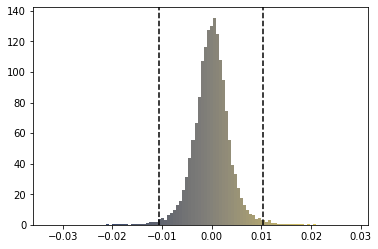

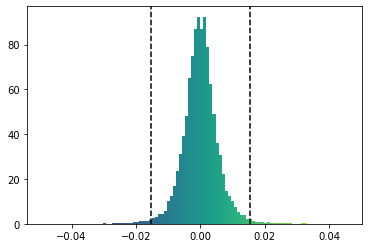

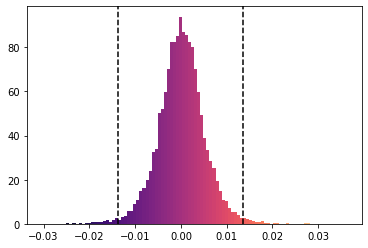

In [35]:
fname = '/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/C1_hist.pdf'
gradient_hist(allcomps.C1.values,nbins=100,palette='cividis',savefl=fname,cuts=cuts['C1'])

fname = '/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/C2_hist.pdf'
gradient_hist(allcomps.C2.values,nbins=100,palette='viridis',savefl=fname,cuts=cuts['C2'])

fname = '/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/C3_hist.pdf'
gradient_hist(allcomps.C3.values,nbins=100,palette='magma',savefl=fname,cuts=cuts['C3'])

# Venn Diagram

In [5]:
# Threshold for significant contribution
perc = 0.025 / 3 
thresh = int(round(allcomps.shape[0] * perc))

# put all top genes into a df, and indicate whether they are coming from the head or tail of the PLS component
topgenes = pandas.DataFrame()
for c in ['C1','C2','C3']:
    genes = allcomps.sort_values(c).dropna().gene_symbol.iloc[-thresh:].tolist()
    genes += allcomps.sort_values(c).dropna().gene_symbol.iloc[:thresh].tolist()
    topgenes[c] = genes
topgenes.loc[:,'tail'] = (['negative'] * thresh) + (['positive'] * thresh)

In [6]:
set(topgenes.C1.values) & set(topgenes.C2.values) & set(topgenes.C3.values)

{'ARL9',
 'ASB2',
 'CASP5',
 'CD6',
 'CDH13',
 'CNTN6',
 'CTXN3',
 'DSP',
 'GABRE',
 'GAL',
 'GPR68',
 'HRH3',
 'KRT31',
 'LRCOL1',
 'LXN',
 'MET',
 'MGAT4C',
 'MGP',
 'NR2F2',
 'ONECUT1',
 'PRRX1',
 'SLC22A10',
 'SLC22A9',
 'TDRD1',
 'TEX26',
 'TLL1',
 'WNT10A'}

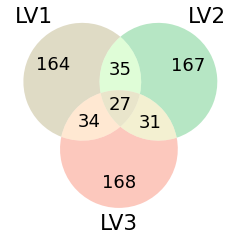

In [181]:
import matplotlib_venn as venn

sns.set_context('notebook',font_scale=1.5)
venn.venn3([set(topgenes.C1.values), 
            set(topgenes.C2.values), 
            set(topgenes.C3.values)], ('LV1', 'LV2', 'LV3'),
          set_colors=pal)
plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/Venn.pdf')
plt.show()

In [21]:
import os
allendir = '/Users/jacobv/abagen-data/microarray/'
probes = pandas.read_csv(os.path.join(allendir,'normalized_microarray_donor10021/Probes.csv'))
probes.head()

,probe_id,probe_name,gene_id,gene_symbol,gene_name,entrez_id,chromosome
0,1058685,A_23_P20713,729,C8G,"complement component 8, gamma polypeptide",733.0,9
1,1058684,CUST_15185_PI416261804,731,C9,complement component 9,735.0,5
2,1058683,A_32_P203917,731,C9,complement component 9,735.0,5
3,1058682,A_23_P138819,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11
4,1058681,A_24_P232500,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11


In [23]:
olapc123 = set(topgenes.C3.values) & set(topgenes.C1.values) & set(topgenes.C2.values)
for x in olapc123:
    #print(int(probes[probes.gene_symbol==x].entrez_id.values[0]))
    print(x)

MET
ONECUT1
DSP
SLC22A9
TDRD1
TEX26
MGP
CDH13
NR2F2
CNTN6
CTXN3
ASB2
GPR68
LXN
ARL9
SLC22A10
LRCOL1
HRH3
PRRX1
TLL1
CASP5
GAL
KRT31
CD6
GABRE
MGAT4C
WNT10A


In [17]:
alltops = np.unique(topgenes[['C1','C2','C3']].values.flatten())

False

In [63]:
jnk = [x for x in alltops if x not in olapc123]
olap1 = [x for x in jnk if x in topgenes.C1.values and x in topgenes.C2.values or \
                   x in topgenes.C1.values and x in topgenes.C3.values or \
                   x in topgenes.C2.values and x in topgenes.C3.values]                                         
for x in olap1:
    print(int(probes[probes.gene_symbol==x].entrez_id.values[0]))

92949
326
11214
144193
9411
140458
9914
624
715
717
1116
497190
339390
1289
56603
1813
93556
2172
83541
23359
150378
50486
2662
2900
727936
10021
55733
3024
9543
3553
3624
8821
9636
26153
3827
3937
3978
441666
728485
150365
4212
26002
4647
91977
4703
4745
8829
10562
94233
26031
344901
5013
29780
7849
5091
27253
56131
5106
5121
23007
5630
5734
153020
54922
5947
92241
83547
9501
132112
9037
6496
8631
51296
57084
91607
8835
10417
81848
10402
29091
8224
148281
256536
7007
387357
124842
84899
63970
9540
10194
128553
57616
340348
7276
7291
10497
50853
58189
79740
7545


In [64]:
nolap = [x for x in alltops if x not in olapc123 and x not in olap1]                                         
for x in nolap:
    print(int(probes[probes.gene_symbol==x].entrez_id.values[0]))

145447
414149
116285
70
81569
130399
8728
171019
9509
11095
56999
116
148
165
134265
84632
183
23382
113146
9447
249
347902
440482
353322
441869
84168
9938
393
395
397
10865
23204
419
433
492
60468
580
64919
597
222389
27319
641
656
54836
684
153579
56967
388135
716
29798
116328
84688
762
55799
93664
794
10203
817
94032
23261
147968
65981
9607
831
858
147372
339965
8030
283234
952
942
925
1009
1010
1004
8099
1029
81620
1050
1052
9662
9023
1121
64377
10519
1154
163732
9022
53405
27098
129607
1258
129684
116840
22837
1690
1300
1301
85301
1290
10229
1346
10814
9362
23418
131544
1466
1471
1473
1522
285154
168002
147906
1630
123879
1643
10522
79961
8527
9249
79132
81624
1735
64150
1745
1746
134218
7802
1906
64800
1947
30846
79767
2027
2042
2044
2048
157697
10613
2104
2115
2119
2070
51059
84908
10144
54757
286336
171483
55120
92565
80307
2272
11259
24147
23769
2354
2295
94234
10023
23401
166752
257019
2487
23105
56884
8324
8325
2565
2571
2589
2591
51809
9615
81544
2690
26035
2731
2738
2742
9

In [92]:
# for x in probes.entrez_id.unique():
#     if pandas.isnull(x): continue
#     print(int(x))

In [2]:
comp3 = pandas.read_csv('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/ToppGeneJune2022/ThreeCompGenes.txt',
                       sep='\t')
comp2 = pandas.read_csv('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/ToppGeneJune2022/TwoCompGenes.txt',
                       sep='\t')
comp1 = pandas.read_csv('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/ToppGeneJune2022/OneCompGenes.txt',
                       sep='\t')

In [3]:
comb = pandas.concat([comp1,comp2,comp3])
comb.loc[:,'N_Components'] = ['One']*len(comp1) + ['Two']*len(comp2) + ['Three']*len(comp3)

In [51]:
comb[['N_Components'] + comb.columns[:-1].tolist()
    ].to_csv('./tables/STable_GeneAnnotNComp.csv',index=False)

[Text(0, 0, 'GO: Molecular Function'),
 Text(1, 0, 'GO: Biological Process'),
 Text(2, 0, 'GO: Cellular Component'),
 Text(3, 0, 'Pathway'),
 Text(4, 0, 'Disease')]

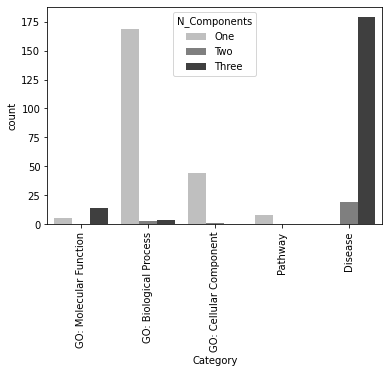

In [79]:
g = sns.countplot(data=comb,x='Category',hue='N_Components',palette='binary')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

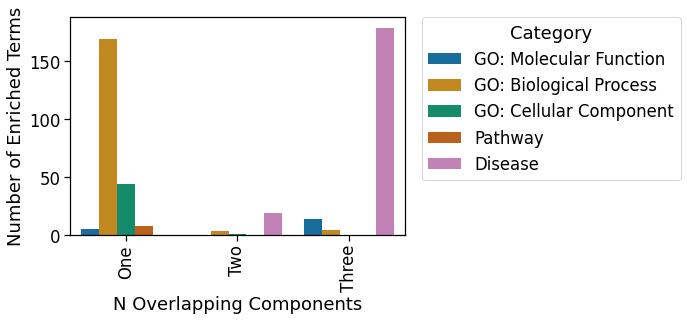

In [89]:
sns.set_context('notebook',font_scale=1.5)
g = sns.countplot(data=comb,x='N_Components',hue='Category',palette='colorblind')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Category')
plt.xlabel('N Overlapping Components')
plt.ylabel('Number of Enriched Terms')
plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/TermEnrichment.pdf',
           bbox_inches='tight')

In [8]:
comb[(comb.N_Components=='Three') & (comb.Category=='Disease')
    ].sort_values('q-value FDR B&H').Name.values

array(['Leiomyomatosis',
       'Progressive cardiomyopathic lentiginosis syndrome',
       'EPIDERMOLYSIS BULLOSA, LETHAL ACANTHOLYTIC',
       'ARRHYTHMOGENIC RIGHT VENTRICULAR DYSPLASIA, FAMILIAL, 8',
       'circulation problem',
       'CONGENITAL HEART DEFECTS, MULTIPLE TYPES, 4',
       'Advanced Cervical Carcinoma', 'Hypertension',
       'AMELOGENESIS IMPERFECTA, HYPOMATURATION TYPE, IIA6',
       'SKIN FRAGILITY-WOOLLY HAIR SYNDROME', 'ATRIAL SEPTAL DEFECT 6',
       'Osteofibrous dysplasia',
       'Cardiomyopathy dilated with Woolly hair and keratoderma',
       'stage IB non-small cell lung cancer',
       'CARDIOMYOPATHY, DILATED, WITH WOOLLY HAIR AND KERATODERMA',
       'Hyperhidrosis Palmaris Et Plantaris', 'Primary seminoma',
       'Atrial Septal Defect 6', 'Generalized convulsive epilepsy',
       'Childhood L2 Acute Lymphoblastic Leukemia',
       'Mucocutaneous herpes simplex', 'Retrognathia',
       'Dilated cardiomyopathy with woolly hair and keratoderma',
     

# Full term enrichment

In [90]:
for x in alltops:
    print(int(probes[probes.gene_symbol==x].entrez_id.values[0]))

145447
414149
116285
70
81569
130399
8728
171019
9509
11095
56999
92949
116
148
165
134265
84632
183
23382
113146
9447
326
11214
249
144193
347902
440482
353322
441869
84168
9938
9411
393
395
397
10865
23204
132946
419
51676
140458
433
492
9914
60468
580
64919
597
624
222389
27319
641
656
54836
684
153579
56967
388135
715
716
717
29798
116328
84688
762
55799
93664
794
10203
817
94032
23261
147968
65981
9607
838
831
858
147372
339965
8030
283234
952
923
942
925
1009
1010
1012
1004
8099
1029
81620
1050
1052
9662
9023
1116
1121
64377
10519
1154
163732
497190
339390
9022
53405
27098
129607
1258
27255
129684
116840
22837
1690
1300
1301
85301
1289
1290
10229
1346
10814
9362
23418
131544
1466
1471
1473
1522
613212
285154
56603
168002
147906
1630
123879
1643
10522
79961
8527
9249
79132
81624
1735
64150
1745
1746
134218
7802
1813
1832
1906
64800
1947
93556
30846
79767
2027
2042
2044
2048
157697
10613
2104
2115
2119
2070
2172
83541
51059
84908
10144
23359
54757
286336
171483
55120
92565
80307
22

In [53]:
enr = pandas.read_csv('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/ToppGeneJune2022/AllComponents.txt',
                     sep='\t')
enr.head()

,Category,ID,Name,Source,p-value,q-value Bonferroni,q-value FDR B&H,q-value FDR B&Y,Hit Count in Query List,Hit Count in Genome,Hit in Query List
0,GO: Molecular Function,GO:0005201,extracellular matrix structural constituent,,1.808000e-08,0.000020,0.000020,0.000152,24,190,"THSD4,MATN2,CHI3L1,SLIT2,MFGE8,MGP,AEBP1,COL5A..."
1,GO: Molecular Function,GO:0005509,calcium ion binding,,5.091000e-08,0.000056,0.000024,0.000185,56,786,"PCP4,MATN2,RYR3,EHD2,SLIT2,MFGE8,CPNE6,MGP,PCD..."
2,GO: Molecular Function,GO:0005102,signaling receptor binding,,6.628000e-08,0.000073,0.000024,0.000185,101,1802,"EPHB2,PIK3AP1,RERG,RTP1,RAMP3,HLA-A,HLA-B,HLA-..."
3,GO: Molecular Function,GO:0005539,glycosaminoglycan binding,,1.727000e-05,0.019100,0.004383,0.033250,23,259,"VIT,SLIT2,PLA2G5,COL5A1,COL11A1,VASN,HAMP,SOD3..."
4,GO: Molecular Function,GO:0005198,structural molecule activity,,1.981000e-05,0.021910,0.004383,0.033250,46,728,"THSD4,MATN2,MBP,OBSCN,CHI3L1,MRPS36,SLIT2,MFGE..."


In [54]:
enr.loc[:,'ratio'] = enr['Hit Count in Query List'].values / enr['Hit Count in Genome'].values
enr.loc[:,'log10Q(Bonf)'] = -np.log10(enr['q-value Bonferroni'].values)

In [116]:
enr[enr.Category=='GO: Biological Process'].sort_values('q-value Bonferroni')[['Name',
                                                                               'log10Q(Bonf)',
                                                                               'ratio']
                                                                             ].head(20)

,Name,log10Q(Bonf),ratio
14,sensory organ development,7.729321,0.074640
15,anterograde trans-synaptic signaling,6.218460,0.075212
16,chemical synaptic transmission,6.218460,0.075212
17,trans-synaptic signaling,6.034563,0.074502
18,synaptic signaling,5.616903,0.072895
19,sensory system development,4.653256,0.072645
20,animal organ morphogenesis,4.648784,0.059870
21,sensory organ morphogenesis,4.643401,0.086466
22,negative regulation of neuron projection devel...,4.556424,0.132275
23,cellular component morphogenesis,4.373454,0.066548


In [56]:
termcats = {'sensory organ development': ['sensory organ development',
                                         'sensory system development',
                                         'animal organ morphogenesis', 
                                          'sensory organ morphogenesis',
                                         'eye development',
                                         'visual system development',
                                         'camera-type eye development',],
            'synaptic signaling': ['anterograde trans-synaptic signaling',
                                  'trans-synaptic signaling',
                                  'chemical synaptic transmission',
                                  ],
            'cell projection development': ['negative regulation of neuron projection development',
                                          'negative regulation of cell projection organization',
                                           'regulation of neuron projection development',],
            'cellular development': ['cellular component morphogenesis',
                                    'negative regulation of cell growth',
                                    'negative regulation of growth',
                                    'regulation of cell growth',],
            'neurogenesis': ['negative regulation of neurogenesis',
                            'tissue morphogenesis',
                            'camera-type eye morphogenesis',
                            'anatomical structure formation involved in morphogenesis',],
            'extracellular matrix development': ['extracellular matrix organization',
                                                'extracellular structure organization',
                                                'external encapsulating structure organization',],
            'embyronic morphogenesis': ['embryonic morphogenesis',],
            'multicellular organis process': ['negative regulation of multicellular organismal process',],
            'cell adhesion': ['cell adhesion',]
           }

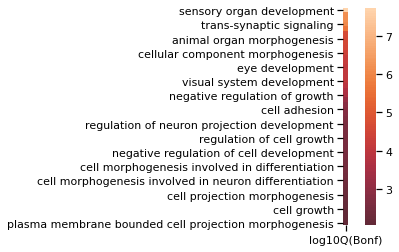

In [131]:
sns.set_context('notebook',font_scale=1)
bonf = enr[(enr.Category=='GO: Biological Process') & (enr['log10Q(Bonf)']>2)]
jnk = pandas.DataFrame(bonf['log10Q(Bonf)'])
jnk.index = bonf.Name.values
g=sns.heatmap(jnk,square=True,center=0)
#g.set_yticklabels(bonf.Name.values)


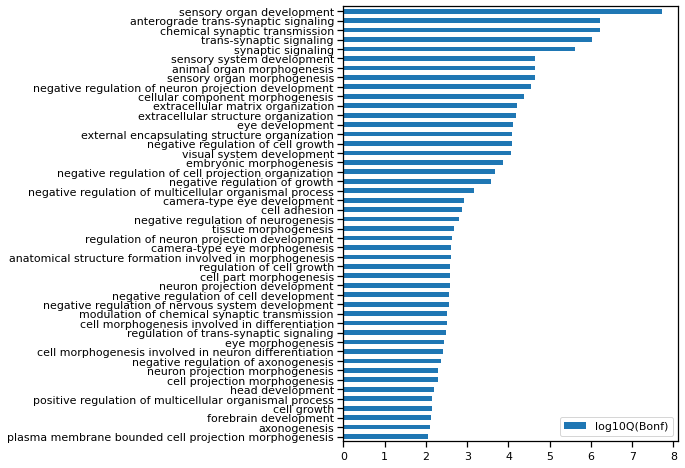

In [144]:
jnk.sort_values('log10Q(Bonf)').plot.barh(figsize=(6,8))
plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/GO_BP_allgene.pdf',
           bbox_inches='tight')

In [57]:
enr.loc[:,'log10Q(FDR)'] = -np.log10(enr['q-value FDR B&H'].values)

In [58]:
enr.to_csv('./tables/STable_GeneAnnot.csv',index=False)

In [149]:
fdr = enr[(enr.Category=='Disease')]
jnk = pandas.DataFrame(bonf['log10Q(FDR)'])
jnk.index = bonf.Name.values
jnk

,log10Q(FDR)
Abnormal behavior,3.312471
Attention deficit hyperactivity disorder,1.382790
Bipolar Disorder,1.382790
Autistic Disorder,1.382790
Mental disorders,1.382790
Coronal craniosynostosis,1.382790
"DEAFNESS, AUTOSOMAL RECESSIVE 2",1.382790
Reactive Hyperemia,1.382790
Active Hyperemia,1.382790
Hyperemia,1.382790


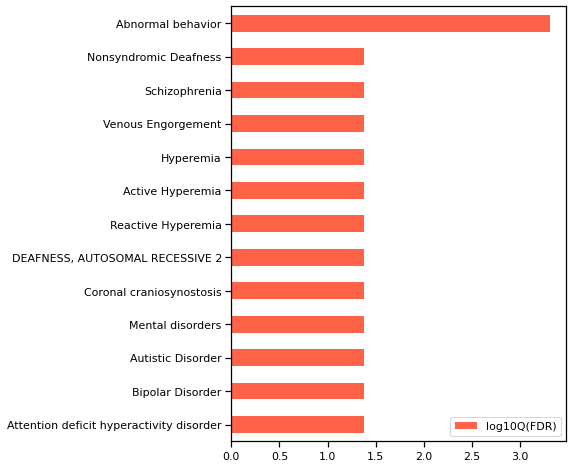

In [153]:
jnk.sort_values('log10Q(FDR)').plot.barh(figsize=(6,8),color='tomato')
plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/GO_disease_allgene.pdf',
           bbox_inches='tight')

# Visualize magma

In [182]:
P1 = pandas.read_csv('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/MAGMA/Mallard_P1.csv')
P1.columns = [x.strip() for x in P1.columns]

In [183]:
P1

,VARIABLE,TYPE,NGENES,BETA,BETA_STD,SE,P
0,C1_pos,SET,107,0.014242,0.001103,0.091098,0.437890
1,C1_neg,SET,108,0.186920,0.014539,0.096277,0.026107
2,C2_pos,SET,111,-0.031640,-0.002495,0.097775,0.626880
3,C2_neg,SET,102,-0.047106,-0.003561,0.090990,0.697670
4,C3_pos,SET,106,0.230730,0.017781,0.097752,0.009134
5,C3_neg,SET,104,-0.154170,-0.011769,0.091770,0.953510


/Users/jacobv/pls_gxp/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


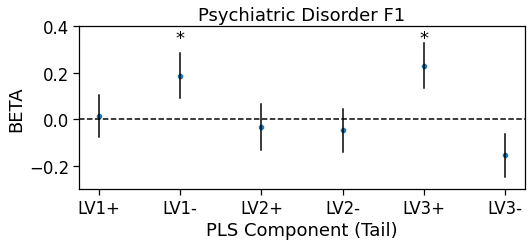

In [191]:
sns.set_context('notebook',font_scale=1.5)
plt.subplots(figsize=(8,3))
g = sns.scatterplot(x='VARIABLE',y='BETA',data=P1)
for i,row in P1.iterrows():
    x = row['VARIABLE']
    se = row['SE']
    b = row['BETA']
    plt.plot([x,x],[b-se,b+se],c='k')
    if row['P'] < 0.05:
        plt.text(x,0.33,'*',ha='center')
plt.ylim(-0.3,0.4)
plt.axhline(0,ls='--',c='k')
plt.xlabel('PLS Component (Tail)')
plt.ylabel('BETA')
plt.title('Psychiatric Disorder F1')
g.set_xticklabels(['LV1+','LV1-','LV2+','LV2-','LV3+','LV3-'])
plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/MAGMA_MALLARD_F1.pdf',
           bbox_inches='tight')

In [40]:
P1

,VARIABLE,TYPE,NGENES,BETA,BETA_STD,SE,P
0,C1_pos,SET,107,0.014242,0.001103,0.091098,0.437890
1,C1_neg,SET,108,0.186920,0.014539,0.096277,0.026107
2,C2_pos,SET,111,-0.031640,-0.002495,0.097775,0.626880
3,C2_neg,SET,102,-0.047106,-0.003561,0.090990,0.697670
4,C3_pos,SET,106,0.230730,0.017781,0.097752,0.009134
5,C3_neg,SET,104,-0.154170,-0.011769,0.091770,0.953510


In [42]:
from statsmodels.stats.multitest import multipletests
multipletests(P1.P.values,method='fdr_bh')

(array([False, False, False, False, False, False]),
 array([0.837204, 0.078321, 0.837204, 0.837204, 0.054804, 0.95351 ]),
 0.008512444610847103,
 0.008333333333333333)

/Users/jacobv/pls_gxp/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



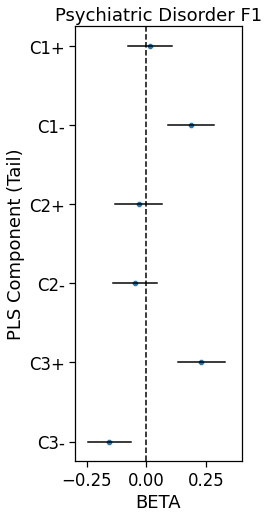

In [200]:
sns.set_context('notebook',font_scale=1.5)
plt.subplots(figsize=(3,8))
g = sns.scatterplot(y='VARIABLE',x='BETA',data=P1)
for i,row in P1.iterrows():
    y = row['VARIABLE']
    se = row['SE']
    b = row['BETA']
    plt.plot([b-se,b+se],[y,y],c='k')
plt.xlim(-0.3,0.4)
plt.axvline(0,ls='--',c='k')
plt.ylabel('PLS Component (Tail)')
plt.xlabel('BETA')
plt.title('Psychiatric Disorder F1')
g.set_yticklabels(['C1+','C1-','C2+','C2-','C3+','C3-'])
plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/MAGMA_MALLARD_F1_h.pdf',
           bbox_inches='tight')

/Users/jacobv/pls_gxp/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


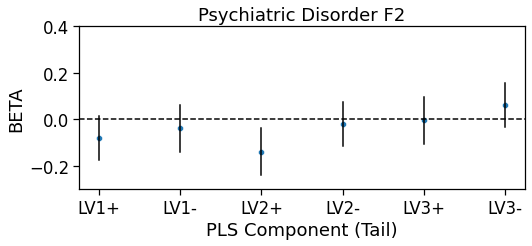

In [192]:
P2 = pandas.read_csv('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/MAGMA/Mallard_P2.csv')
P2.columns = [x.strip() for x in P2.columns]
plt.subplots(figsize=(8,3))
g = sns.scatterplot(x='VARIABLE',y='BETA',data=P2)
for i,row in P2.iterrows():
    x = row['VARIABLE']
    se = row['SE']
    b = row['BETA']
    plt.plot([x,x],[b-se,b+se],c='k')
    if row['P'] < 0.05:
        plt.text(x,0.33,'*',ha='center')
plt.ylim(-0.3,0.4)
plt.axhline(0,ls='--',c='k')
plt.xlabel('PLS Component (Tail)')
plt.ylabel('BETA')
plt.title('Psychiatric Disorder F2')
g.set_xticklabels(['LV1+','LV1-','LV2+','LV2-','LV3+','LV3-'])
plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/MAGMA_MALLARD_F2.pdf',
           bbox_inches='tight')

/Users/jacobv/pls_gxp/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



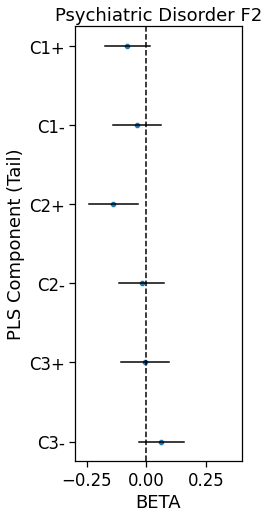

In [201]:
plt.subplots(figsize=(3,8))
g = sns.scatterplot(y='VARIABLE',x='BETA',data=P2)
for i,row in P2.iterrows():
    y = row['VARIABLE']
    se = row['SE']
    b = row['BETA']
    plt.plot([b-se,b+se],[y,y],c='k')
plt.xlim(-0.3,0.4)
plt.axvline(0,ls='--',c='k')
plt.ylabel('PLS Component (Tail)')
plt.xlabel('BETA')
plt.title('Psychiatric Disorder F2')
g.set_yticklabels(['LV1+','LV1-','LV2+','LV2-','LV3+','LV3-'])
plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/PostFix/subfigs/MAGMA_MALLARD_F2_h.pdf',
           bbox_inches='tight')

# Comparison with Ypsilanti 2022 PNAS

In [18]:
RC = ['ETV5', 'LMO1','MEIS2','MYCL1','NPAS3','NR2E1','PAX6','PBX1',
     'POU3F1','POU3F3','SOX9','TLE1','ZIC1','ZIC5']
shar = [x for x in RC if x in alltops]
print('RC shared:', shar ,'%s%%'%(round((len(shar)/len(RC))*100)))

CR = ['ARX','BCL11A','DACH1','DMRT3','EMX2','FEZF2','LEF1','LHX2',
     'MYCN','NFATC4','NFIB','NFIX','NR2F1','NR2F2','SP8','TCF4','TSHZ1']
shar2 = [x for x in CR if x in alltops]
print('CR shared:', shar2 ,'%s%%'%(round((len(shar2)/len(CR))*100)))

Others = ['ASCL1','HES5','PLAGL1','TRIM28','ID3','LMX1A','DMRT5']
shar3 = [x for x in Others if x in alltops]
print('Other shared:', shar3 ,'%s%%'%(round((len(shar3)/len(Others))*100)))

allshar = shar + shar2 + shar3
print('Other shared:','%s%%'%(round((len(allshar)/len(Others+CR+RC))*100)))


RC shared: ['ETV5', 'MEIS2', 'NR2E1', 'PAX6', 'POU3F1', 'POU3F3', 'TLE1', 'ZIC1'] 57%
CR shared: ['NR2F2', 'TSHZ1'] 12%
Other shared: [] 0%
Other shared: 26%


In [29]:
len(allshar)

10

In [26]:
Ypsi = RC + CR + Others
null = pandas.DataFrame()
for i in range(1000):
    rset = np.random.choice(allcomps.gene_symbol.values,len(alltops),replace=False)
    olap = len(set(rset) & set(Ypsi))
    null.loc[i,'overlap_n'] = olap
    null.loc[i,'overlap_prop'] = olap / len(Ypsi)

In [35]:
null.sort_values('overlap_n')['overlap_prop'].values[50]

0.0

In [34]:
null.sort_values('overlap_n')['overlap_prop'].values

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
null.overlap_prop.mean()

0.033763157894736835

In [62]:
alltops = list(set(topgenes.C1.tolist() + topgenes.C2.tolist() + topgenes.C3.tolist()))

In [164]:
gene = 'HLA'
fhits = [x for x in allcomps.index.values if gene in x]
thits = [x for x in alltops if gene in x]
print(len(fhits),'hits in full allen dataset:',fhits)
print(len(thits),'hits in top set:',thits)

25 hits in full allen dataset: ['HHLA3', 'HLA-A', 'HLA-B', 'HLA-C', 'HLA-DMA', 'HLA-DMB', 'HLA-DOA', 'HLA-DOB', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DPB2', 'HLA-DQB1', 'HLA-DQB2', 'HLA-DRA', 'HLA-DRB1', 'HLA-DRB3', 'HLA-DRB4', 'HLA-DRB5', 'HLA-E', 'HLA-F', 'HLA-F-AS1', 'HLA-G', 'HLA-H', 'HLA-J', 'HLA-L']
4 hits in top set: ['HLA-B', 'HLA-A', 'HLA-F', 'HLA-J']


In [174]:
allcomps.loc[:,'avg_weight'] = allcomps[['C1','C2','C3']].abs().mean(1).values

In [176]:
allcomps.sort_values('avg_weight',ascending=False).head(20)

,gene_symbol,gene_name,C1,C2,C3,C1_genelist,C2_genelist,C3_genelist,avg_weight
MGP,MGP,matrix Gla protein,0.020616,-0.049167,-0.030331,1.0,1.0,1.0,0.033371
PRRX1,PRRX1,paired related homeobox 1,-0.032893,0.045387,0.019155,1.0,1.0,1.0,0.032478
MET,MET,met proto-oncogene (hepatocyte growth factor r...,0.028420,-0.041018,-0.023365,1.0,1.0,1.0,0.030934
AMDHD1,AMDHD1,amidohydrolase domain containing 1,-0.024942,0.043567,0.010101,1.0,1.0,0.0,0.026203
TDRD1,TDRD1,tudor domain containing 1,0.018040,-0.037829,-0.022110,1.0,1.0,1.0,0.025993
LXN,LXN,latexin,0.024828,-0.033686,-0.014350,1.0,1.0,1.0,0.024288
CTXN3,CTXN3,cortexin 3,-0.023950,0.029313,0.015700,1.0,1.0,1.0,0.022988
TEX26,TEX26,testis expressed 26,-0.014798,0.023314,0.027457,1.0,1.0,1.0,0.021857
CD6,CD6,CD6 molecule,-0.014209,0.031913,-0.017870,1.0,1.0,1.0,0.021331
KRT31,KRT31,keratin 31,-0.017854,0.025526,0.020559,1.0,1.0,1.0,0.021313


In [ ]:
prob = ['BMP8B','PAX8',] 
poss = ['FOXF2','FOXQ1','GLI4','TLX2','NR2F2','TGFB1']
fasho = ['PAX6','SIX3','BCL11B','LHX6','EPHA5','CDH6','NR2F2','PCDH8','TSHZ2']
WNTS = ['WNT2B', 'WNT3', 'WNT5A', 'WNT10A', 'WNT7A',]
Receptors = ['HTR1E','HTR2C','HTR7',]

BMP = Bone morphogenic protein
FOX = Forkhead box 
PAX = Paired box
LHX6 --> Necessary for differentiation of interneurons
BCL11B -- > Layer specific transcription factor
EPHA3 --> Area-specific, caudorostral gradient
EPHA5 --> Area-specific (dorsolateral cortex)
CDH6 --> Area-specific, caudorostral gradient
NR2F2 --> Area-specific, temporal
PCHD8 --> Area-specific, caudorostral
SLN --> Area-specific, Rostrocaudoal gradient
TSHZ2 --> Area-specific, (occipital cortex)

High number of CDHs and PCDHs (11), WNTs (5), ADAMTS (5), KCs (6), SEMA (3) | HLA (4), ARHGAP (4)